# HW 10 CLUSTERING BUSINESS

#cluster time trends in NYC businesses: 
#DATA
#Census Business data:
##download census data for businesses by ZIP code. the data is here
http://www.census.gov/econ/cbp/download/
##and it can be downloaded by hand. you can also download it with 3 terminal commands as follows: the data from 1993 through 2001 is different in the format of its path than the data after 2001 (that is why more than one for loop is needed)



#NYC zip codes shape file is here
##http://data.nycprepared.org/dataset/nyc-zip-code-tabulation-areas/resource/0c0e14e9-78e1-404e-97b0-c2fabceb3981


NOTES: 
to read in a zip file without unzipping it you can use the pandas and zipfile packages

In [85]:
import pandas as pd
import glob
import os
import sklearn.cluster as skc
import geopandas as gp
import pylab as pl

%pylab inline

pl.style.use('bmh')

Populating the interactive namespace from numpy and matplotlib


## Data Cleaning

In [70]:
#reading in all the data
i=0
dfs = [None] * len(glob.glob('data/*.txt'))
for fname in glob.glob('data/*.txt'):
    dfs[i] = (pd.read_csv(fname))
    i+=1
    
ny = gp.read_file('data/nyc-zip-code-tabulation-areas-polygons.geojson')    

In [71]:
#Array on Manhattan zipcodes
zips = ny.postalCode

#converting column names uniformally to lowercase and converting the index values to zipcode
for i, year in enumerate(dfs):
    dfs[i].columns = [col.lower() for col in map(str, dfs[i].columns)]
    dfs[i] = dfs[i].iloc[:,[0,6]]
    #dfs[i] = pd.DataFrame(dfs[i]['est'])
       

In [72]:
all_business = dfs[0]
for i in range(1, len(dfs)):
    all_business = all_business.merge(dfs[i], how='inner', left_index=True, right_index=True, suffixes = (str(i + 1993), str(i+1994)), copy = False)


In [73]:
ny_business = (all_business[all_business['zip1994'].isin(zips.astype(int64))])

In [74]:
cols_to_drop = [a+b for a, b in zip(['zip'] * len(map(str, range(1995,2014))), map(str, range(1995,2014)))]
ny_business = ny_business.drop(cols_to_drop, axis = 1)

In [75]:
# I feel obliged to point out that I got this beautiful code to reorder columns here:
# http://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns

old_cols = ny_business.columns.tolist()
ny_business = ny_business[old_cols[0:7] + [old_cols[14]]+ old_cols[8:14] + [old_cols[7]] + old_cols[15:]]

In [76]:
#renaming columns for uniformity

new_columns = [x+y for x, y in zip(['est'] * len(map(str, range(1994,2014))), map(str, range(1994,2014)))]
new_columns.insert(0, 'zip')

ny_business.columns = new_columns

## Data Normalization

In [78]:
white_ny_business = ny_business[ny_business.columns[1:]] - (ny_business[ny_business.columns[1:]].sum(axis = 0)/len(white_ny_business.axes[1])) 
white_ny_business = white_ny_business/white_ny_business.std(axis = 0)
white_ny_business = white_ny_business.T



In [79]:
white_ny_business = white_ny_business.dropna()
white_ny_business = white_ny_business.drop_duplicates()
res = skc.KMeans(n_clusters=8, max_iter=300).fit(white_ny_business[1:])
white_ny_business.shape

(20, 239)

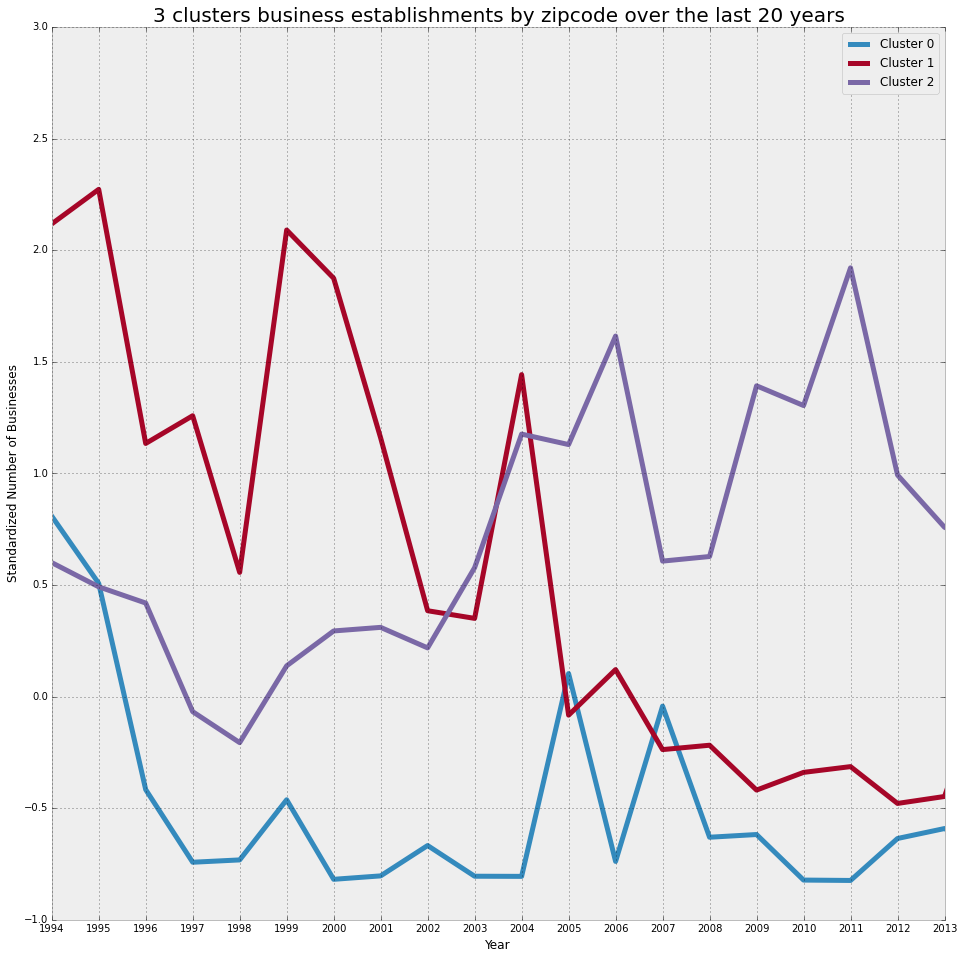

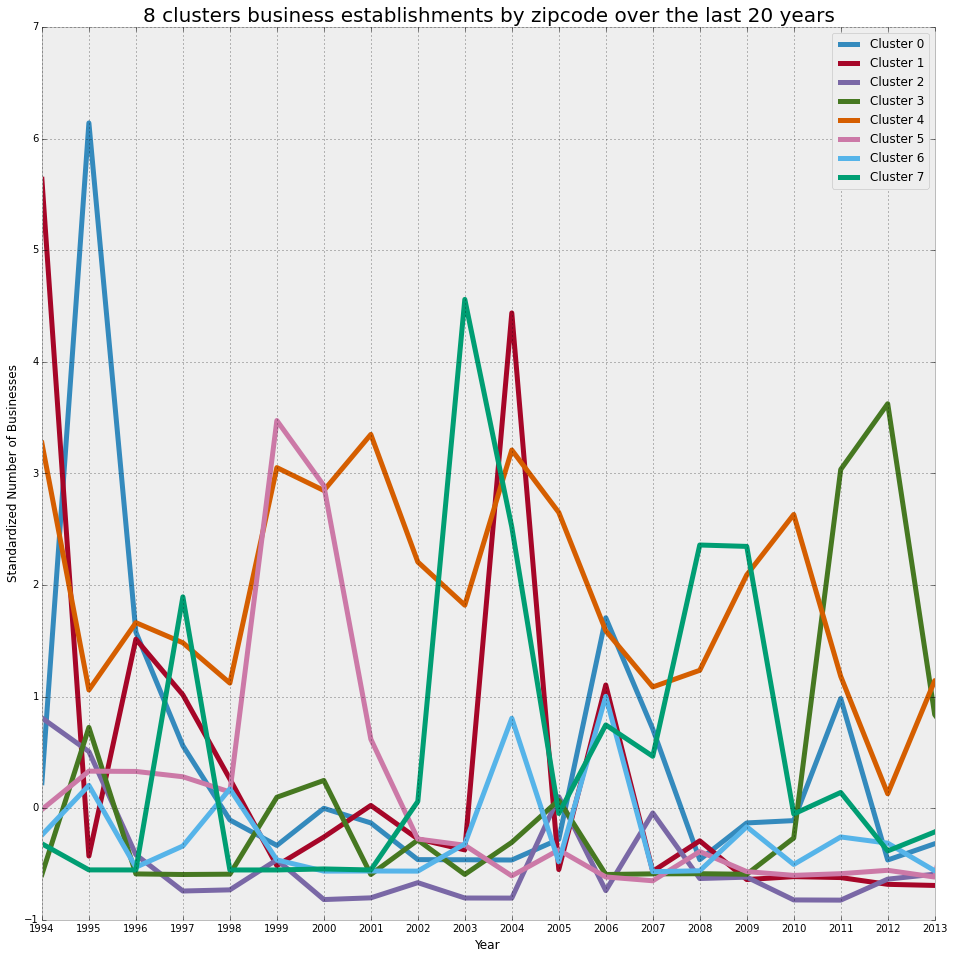

In [94]:
labels = []
def plot_clusters(n_clusters):
    labels = None * len(n_clusters)
    for j in n_clusters:
        res = skc.KMeans(n_clusters=j, max_iter=300).fit(white_ny_business[1:])
        figure, ax = pl.subplots(figsize=(16,16))
        num_clusters = len(res.cluster_centers_)
        
        labels[i] = 

        for i in range(num_clusters):
            ax.plot(res.cluster_centers_[i], linewidth=5, label='Cluster %s' % i)

        ax.set_xlim([0,19])
        ax.set_title('%s clusters business establishments by zipcode over the last 20 years' % j, fontsize = 20)
        ax.set_xticks(np.arange(20))
        ax.set_xticklabels(1994 + np.arange(20))
        ax.set_xlabel('Year')
        ax.set_ylabel('Standardized Number of Businesses')
        ax.legend()
    
plot_clusters([3, 8])


TASKS:
    
    1. get and prep your data.
    2. cluster the NUMBER OF ESTABLISHMENTS time series with K-means in **a few** clusters (as discussed there is no real good, sound way to decide what a good number is here. try a few options, keeping in mind a few is more than a couple, but i recommand you stay within the single digit numbers)
    3. plot the cluster centers (if you used K means those are the means of the clusters). you can plot for example the cluster centers overlayed on each time series (using the alpha channel to control the opacity in the plot may be helpful here).
    4. Use another clustering algorithm (of your choice)
    5. overlay your data on a NYC map: you can use shapefiles for the zip codes and different colors for different clusters
    6. Compare the results of the 2 algorithms
    7. attempt an interpretation. this is dangerous ground: clustering is an exploratory tool so you do not want to jump to conclusions because you see some clusters! but seeing structure in your data can inform your next moves as an investigator. 
    